In [1]:
# Labelling template

In [2]:
from skimage.io import imread
import numpy as np
from tnia.plotting.plt_helper import random_label_cmap
from pathlib import Path
from skimage.io import imread
import matplotlib.pyplot as plt
from stardist.models import StarDist2D, Config2D
from tnia.plotting.plt_helper import imshow_multi2d

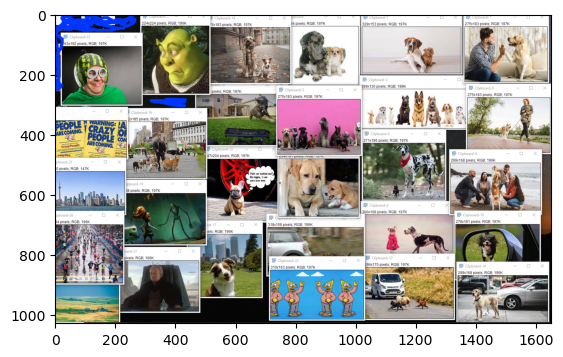

In [4]:

tnia_images_path = Path(r'D:\images')
parent_path=Path(tnia_images_path / r'tnia-python-images/imagesc/2024_03_18_this_cant_possibly_work')
model_path = parent_path / 'model'
from csbdeep.utils import normalize

test_name='dog_train.tif'
testim = imread(parent_path  / test_name) 
testim = normalize(testim,1,99.8, axis=(0,1))

testim_crop = testim[150:800,:]
testim_crop = normalize(testim_crop,1,99.8, axis=(0,1))
plt.imshow(testim)

In [5]:
testim.shape, testim.dtype, testim.max(), testim.min()

((1028, 1652, 3), dtype('float32'), 1.0, 0.0)

In [6]:
model_name = None
previous = None

if model_name is not None:
    model = StarDist2D(config=None, name="model_aug", basedir=model_path)
    labels, details = model.predict_instances(testim, prob_thresh=0.5, nms_thresh=0.1)
elif previous is not None:
    labels = imread(label_path / previous)
else:
    labels = np.zeros([testim.shape[0], testim.shape[1]], dtype = np.uint16)


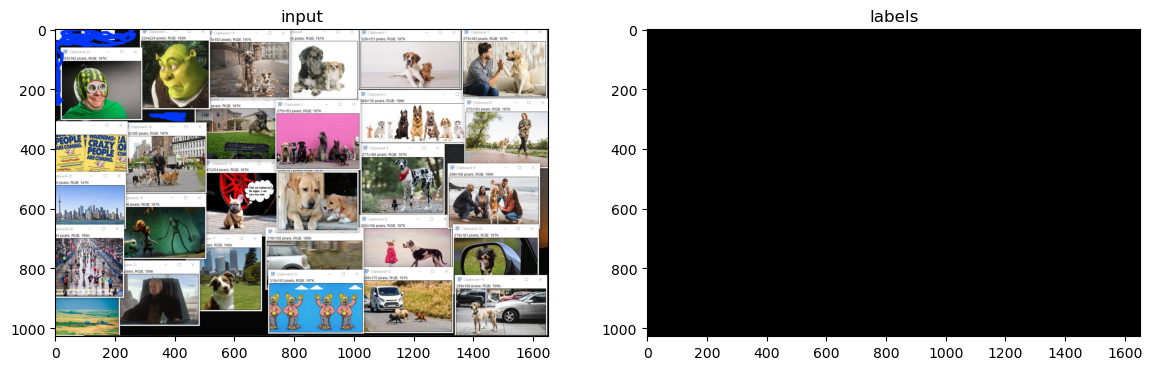

In [7]:
fig = imshow_multi2d([testim,labels],['input','labels'],1,2, width=14, height=8,colormaps=['gray', random_label_cmap()])

In [8]:
import napari
viewer = napari.Viewer()
viewer.add_image(testim, name='testim')
viewer.add_labels(labels, name='predicted octohedrons')

napari.manifest -> 'napari-hello' could not be imported: Cannot find module 'napari_plugins' declared in entrypoint: 'napari_plugins:napari.yaml'


<Labels layer 'predicted octohedrons' at 0x1e4b70419d0>

In [11]:
base_name = test_name.split('.')[0]
print(base_name)

dog_train


In [12]:
from skimage.io import imsave
import os

labels_path = parent_path / 'labels'

if not os.path.exists(labels_path):
    os.makedirs(labels_path)

name = base_name + '-labels-corrected.tif'
imsave(labels_path / name , labels.astype('uint16'))

4270931344.py (10): D:\images\tnia-python-images\imagesc\2024_03_18_this_cant_possibly_work\labels\dog_train-labels-corrected.tif is a low contrast image


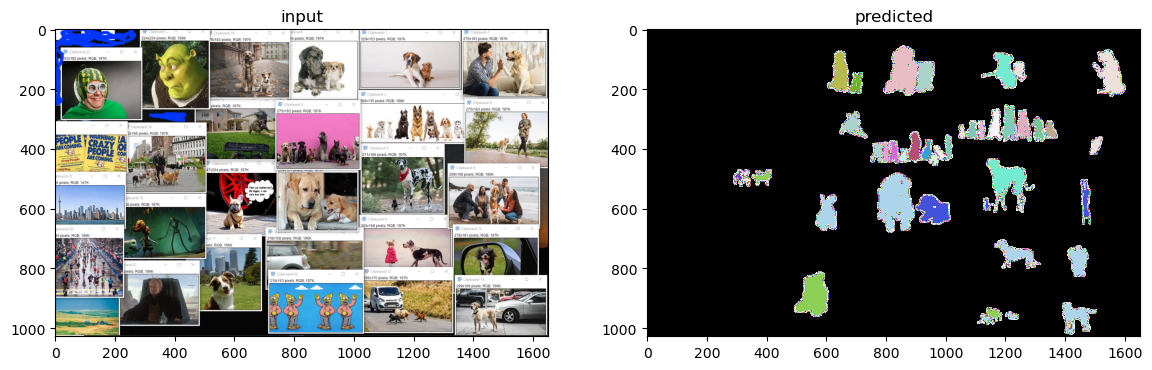

In [13]:
labels_test = imread( labels_path / name) 
fig = imshow_multi2d([testim,labels_test],['input','predicted'],1,2, width=14, height=8,colormaps=['gray', random_label_cmap()])